In [8]:
%matplotlib inline
import requests
import json

In [9]:
# get domain object
domain = "craterlake.test.hdfgroup.org"
headers = {'host': domain}
endpoint = "http://127.0.0.1:5000"
req = endpoint + '/'
print "REQ:", req
print "RSP:"
rsp = requests.get(req, headers=headers)
domain_json = rsp.json()
print json.dumps(rsp.json(), indent=2)

REQ: http://127.0.0.1:5000/
RSP:
{
  "lastModified": "2015-07-08T23:04:18Z", 
  "hrefs": [
    {
      "href": "http://craterlake.test.hdfgroup.org/", 
      "rel": "self"
    }, 
    {
      "href": "http://craterlake.test.hdfgroup.org/datasets", 
      "rel": "database"
    }, 
    {
      "href": "http://craterlake.test.hdfgroup.org/groups", 
      "rel": "groupbase"
    }, 
    {
      "href": "http://craterlake.test.hdfgroup.org/datatypes", 
      "rel": "typebase"
    }, 
    {
      "href": "http://craterlake.test.hdfgroup.org/groups/a96ccff0-25c5-11e5-896c-3c15c2da029e", 
      "rel": "root"
    }
  ], 
  "root": "a96ccff0-25c5-11e5-896c-3c15c2da029e", 
  "created": "2015-07-08T23:04:18Z"
}


In [10]:
# save the root group uuid
root_uuid = domain_json['root']
# get 'Data' link of root group
req = endpoint + '/groups/' + root_uuid + '/links/Data'
print "REQ:", req
print "RSP:"
rsp = requests.get(req, headers=headers)
link_json = rsp.json()
print json.dumps(rsp.json(), indent=2)


REQ: http://127.0.0.1:5000/groups/a96ccff0-25c5-11e5-896c-3c15c2da029e/links/Data
RSP:
{
  "lastModified": "2015-07-08T23:03:08Z", 
  "hrefs": [
    {
      "href": "http://craterlake.test.hdfgroup.org/groups/a96ccff0-25c5-11e5-896c-3c15c2da029e/links/Data", 
      "rel": "self"
    }, 
    {
      "href": "http://craterlake.test.hdfgroup.org/groups/a96ccff0-25c5-11e5-896c-3c15c2da029e", 
      "rel": "root"
    }, 
    {
      "href": "http://craterlake.test.hdfgroup.org/", 
      "rel": "home"
    }, 
    {
      "href": "http://craterlake.test.hdfgroup.org/groups/a96ccff0-25c5-11e5-896c-3c15c2da029e", 
      "rel": "owner"
    }, 
    {
      "href": "http://craterlake.test.hdfgroup.org/datasets/a96cfda6-25c5-11e5-95db-3c15c2da029e", 
      "rel": "target"
    }
  ], 
  "link": {
    "id": "a96cfda6-25c5-11e5-95db-3c15c2da029e", 
    "class": "H5L_TYPE_HARD", 
    "collection": "datasets", 
    "title": "Data"
  }, 
  "created": "2015-07-08T23:03:08Z"
}


In [11]:
dset_uuid = link_json['link']['id']
print dset_uuid

a96cfda6-25c5-11e5-95db-3c15c2da029e


In [12]:
# get the datset obj
req = endpoint + '/datasets/' + dset_uuid
print "REQ:", req
print "RSP:"
rsp = requests.get(req, headers=headers)
dset_json = rsp.json()
print json.dumps(rsp.json(), indent=2)

REQ: http://127.0.0.1:5000/datasets/a96cfda6-25c5-11e5-95db-3c15c2da029e
RSP:
{
  "creationProperties": {
    "fillTime": "H5D_FILL_TIME_IFSET", 
    "layout": {
      "class": "H5D_CONTIGUOUS"
    }, 
    "allocTime": "H5D_ALLOC_TIME_LATE"
  }, 
  "created": "2015-07-08T23:03:08Z", 
  "lastModified": "2015-07-08T23:03:08Z", 
  "attributeCount": 0, 
  "shape": {
    "dims": [
      320, 
      320
    ], 
    "class": "H5S_SIMPLE"
  }, 
  "hrefs": [
    {
      "href": "http://craterlake.test.hdfgroup.org/datasets/a96cfda6-25c5-11e5-95db-3c15c2da029e", 
      "rel": "self"
    }, 
    {
      "href": "http://craterlake.test.hdfgroup.org/groups/a96ccff0-25c5-11e5-896c-3c15c2da029e", 
      "rel": "root"
    }, 
    {
      "href": "http://craterlake.test.hdfgroup.org/datasets/a96cfda6-25c5-11e5-95db-3c15c2da029e/attributes", 
      "rel": "attributes"
    }, 
    {
      "href": "http://craterlake.test.hdfgroup.org/datasets/a96cfda6-25c5-11e5-95db-3c15c2da029e/value", 
      "rel": "dat

REQ: http://127.0.0.1:5000/datasets/a96cfda6-25c5-11e5-95db-3c15c2da029e/value
200


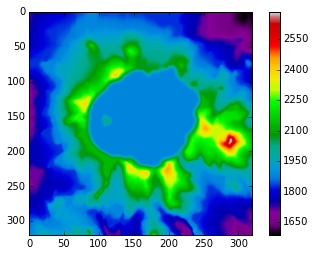

In [13]:
#get the data (finanlly!)
req = endpoint + '/datasets/' + dset_uuid + '/value'
print "REQ:", req
rsp = requests.get(req, headers=headers)
print rsp.status_code
data_json = rsp.json()
values = data_json['value']
import numpy as np
ndarr = np.zeros(dset_json['shape']['dims'],dtype='i4')
ndarr[...] = values
import matplotlib.pyplot as plt
plt.imshow(ndarr)
plt.set_cmap('spectral')
plt.colorbar()
plt.show()


REQ: http://127.0.0.1:5000/datasets/a96cfda6-25c5-11e5-95db-3c15c2da029e/value?select=[140:180,90:130]
200


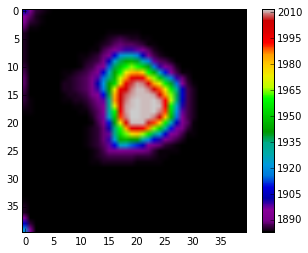

In [14]:
# zoom in on wizard island
req = endpoint + '/datasets/' + dset_uuid + '/value?select=[140:180,90:130]'
print "REQ:", req
rsp = requests.get(req, headers=headers)
print rsp.status_code
data_json = rsp.json()
values = data_json['value']
import numpy as np
ndarr = np.zeros((40,40) ,dtype='i4')
ndarr[...] = values
import matplotlib.pyplot as plt
plt.imshow(ndarr)
plt.set_cmap('spectral')
plt.colorbar()
plt.show()